# Noisy gradient descent experiments
This notebook includes experiments for noisy gradient descent with partial and full covariance.

In [1]:
import jax.numpy as jnp
from jax import random
from noisy_gradient_descent import *
from gradient_descent import gradient_descent_update

This test case approximates $y = x$ for $x \in [0,1]$

Iterations: 101/10000
Iterations: 201/10000
Iterations: 301/10000
Iterations: 401/10000
Iterations: 501/10000
Iterations: 601/10000
Iterations: 701/10000
Iterations: 801/10000
Iterations: 901/10000
Iterations: 1001/10000
Iterations: 1101/10000
Iterations: 1201/10000
Iterations: 1301/10000
Iterations: 1401/10000
Iterations: 1501/10000
Iterations: 1601/10000
Iterations: 1701/10000
Iterations: 1801/10000
Iterations: 1901/10000
Iterations: 2001/10000
Iterations: 2101/10000
Iterations: 2201/10000
Iterations: 2301/10000
Iterations: 2401/10000
Iterations: 2501/10000
Iterations: 2601/10000
Iterations: 2701/10000
Iterations: 2801/10000
Iterations: 2901/10000
Iterations: 3001/10000
Iterations: 3101/10000
Iterations: 3201/10000
Iterations: 3301/10000
Iterations: 3401/10000
Iterations: 3501/10000
Iterations: 3601/10000
Iterations: 3701/10000
Iterations: 3801/10000
Iterations: 3901/10000
Iterations: 4001/10000
Iterations: 4101/10000
Iterations: 4201/10000
Iterations: 4301/10000
Iterations: 4401/100

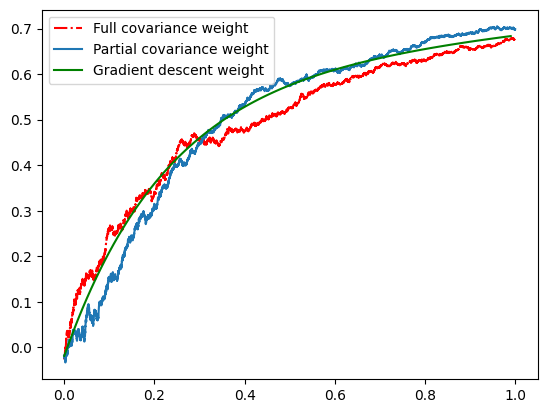

In [5]:
TIME_SIZE = 0.0001
FINAL_TIME = 1.0
LEARNING_RATE = 0.01
noisy_gradient_descent_iterations = int(LEARNING_RATE / TIME_SIZE)

x = jnp.linspace(0.0, 2.0, 100).reshape((100, 1))
y = x

key = random.PRNGKey(4)
sizes = (1, 1)
parital_covariance_parameters = initialize_network_parameters(sizes, key)
full_covariance_parameters = initialize_network_parameters(sizes, key)
gradient_descent_parameters = initialize_network_parameters(sizes, key)
time = jnp.arange(0.0, FINAL_TIME, TIME_SIZE)
weight_full_covariance = []
weight_parital_covariance = []
weight_gradient_descent = []
iterations = 1
max_iterations = time.size

weight_full_covariance.append(parital_covariance_parameters[0][0][0])
weight_parital_covariance.append(full_covariance_parameters[0][0][0])
weight_gradient_descent.append(gradient_descent_parameters[0][0][0])
full_sigma_norms = []
partial_sigma_norms = []
while True:
    key, subkey = random.split(key)
    for _ in range(noisy_gradient_descent_iterations):
        iterations += 1
        if iterations > max_iterations:
            break
        key, subkey = random.split(key)
        full_covariance_parameters, full_sigma_norm = full_covariance_update(
            subkey, full_covariance_parameters, sizes, x, y, TIME_SIZE,
            LEARNING_RATE)
        weight_full_covariance.append(full_covariance_parameters[0][0][0])
        full_sigma_norms.append(full_sigma_norm)
        key, subkey = random.split(key)
        parital_covariance_parameters, partial_sigma_norm = partial_covariance_update(
            subkey, parital_covariance_parameters, x, y, TIME_SIZE,
            LEARNING_RATE)
        weight_parital_covariance.append(
            parital_covariance_parameters[0][0][0])
        partial_sigma_norms.append(partial_sigma_norm)

    if iterations > max_iterations:
        break
    gradient_descent_parameters = gradient_descent_update(
        gradient_descent_parameters, x, y, LEARNING_RATE)
    weight_gradient_descent.append(gradient_descent_parameters[0][0][0])
    print(f'Iterations: {iterations}/{max_iterations}')

plt.figure()
plt.plot(time,
         jnp.array(weight_full_covariance).flatten(),
         "r-.",
         label=f"Full covariance weight")
plt.plot(time,
         jnp.array(weight_parital_covariance).flatten(),
         label=f"Partial covariance weight")
plt.plot(time[::noisy_gradient_descent_iterations],
         jnp.array(weight_gradient_descent).flatten(),
         "g-",
         label=f"Gradient descent weight")
# plt.plot(t, jnp.array(b_sde).flatten(), label=f"sde b")
plt.legend()
# plt.savefig('/home/jonathan/forest/images/large_learn_rate.png')

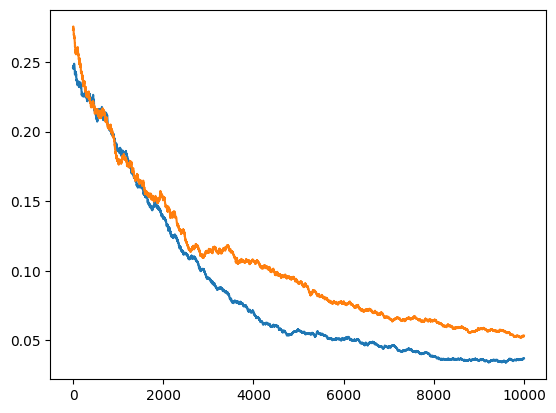

In [ ]:
plt.plot(partial_sigma_norms)
plt.plot(full_sigma_norms)